In [1]:
import torch
torch.__version__

'1.2.0+cu92'

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU, just cast the Tensor to a cuda datatype

In [2]:
x=torch.tensor([4,5,6,9,8])
print(x.type())
print(x.dtype)

torch.LongTensor
torch.int64


In [3]:
x=torch.tensor([4.,5.,6.,9.,8.])
print(x.type())
print(x.dtype)

torch.FloatTensor
torch.float32


In [4]:
list_floats=[0.0, 1.0, 2.0, 3.0, 4.0]

x=torch.tensor(list_floats,dtype=torch.int64)

print(x.type())
print(x.dtype)

torch.LongTensor
torch.int64


In [5]:
twoD_float_tensor = x.view(5, 1)
twoD_float_tensor

print("Original Size: ", x)
print("Size after view method", twoD_float_tensor)

Original Size:  tensor([0, 1, 2, 3, 4])
Size after view method tensor([[0],
        [1],
        [2],
        [3],
        [4]])


In [6]:
#we can have a dynamic size for the tensor using (-1,1)
x.view(-1, 1)

tensor([[0],
        [1],
        [2],
        [3],
        [4]])

In [7]:
# Convert a numpy array to a tensor
import numpy as np
numpy_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
torch.from_numpy(numpy_array)

tensor([0., 1., 2., 3., 4.], dtype=torch.float64)

In [8]:
torch.from_numpy(numpy_array)

tensor([0., 1., 2., 3., 4.], dtype=torch.float64)

In [9]:
y=torch.from_numpy(numpy_array)
back_to_numpy = y.numpy()
back_to_numpy

array([0., 1., 2., 3., 4.])

In [10]:
import pandas as pd
pandas_series=pd.Series([0.1, 2, 0.3, 10.1])
new_tensor=torch.from_numpy(pandas_series.values)

new_tensor

tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)

In [11]:
#iterating each tensor in list
any_list=[]
for i in new_tensor:
    any_list.append(i)
print(any_list)

[tensor(0.1000, dtype=torch.float64), tensor(2., dtype=torch.float64), tensor(0.3000, dtype=torch.float64), tensor(10.1000, dtype=torch.float64)]


In [12]:
#indexing through tensors
new_tensor[1:3]

tensor([2.0000, 0.3000], dtype=torch.float64)

In [13]:
#Tensor functions
print(new_tensor.mean())

print(new_tensor.std())

print(new_tensor.max())

print(new_tensor.min())

tensor(3.1250, dtype=torch.float64)
tensor(4.7275, dtype=torch.float64)
tensor(10.1000, dtype=torch.float64)
tensor(0.1000, dtype=torch.float64)


In [14]:
# Method for calculating the sin result of each element in the tensor

pi_tensor = torch.tensor([0, np.pi/2, np.pi])
sin = torch.sin(pi_tensor)
print("The sin result of pi_tensor: ", sin)

The sin result of pi_tensor:  tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


In [15]:
# First try on using linspace to create tensor

len_5_tensor = torch.linspace(-2, 2, steps = 5)
print ("First Try on linspace", len_5_tensor)

First Try on linspace tensor([-2., -1.,  0.,  1.,  2.])


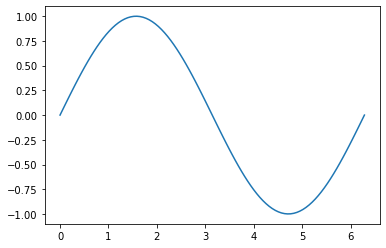

In [16]:
import matplotlib.pyplot as plt

pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)
plt.plot(pi_tensor.numpy(), sin_result.numpy())

In [17]:
twoD_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
twoD_tensor = torch.tensor(twoD_list)
print("The New 2D Tensor: ", twoD_tensor)

The New 2D Tensor:  tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])


In [18]:
twoD_tensor.view(-1,1)

tensor([[11],
        [12],
        [13],
        [21],
        [22],
        [23],
        [31],
        [32],
        [33]])

In [19]:
print("The dimension of twoD_tensor: ", twoD_tensor.ndimension())
print("The shape of twoD_tensor: ", twoD_tensor.shape)
print("The shape of twoD_tensor: ", twoD_tensor.size())
print("The number of elements in twoD_tensor: ", twoD_tensor.numel())

The dimension of twoD_tensor:  2
The shape of twoD_tensor:  torch.Size([3, 3])
The shape of twoD_tensor:  torch.Size([3, 3])
The number of elements in twoD_tensor:  9


In [13]:
#Taking derivatives of tensors

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

y = x ** 2
print("The result of y = x^2: ", y)

The tensor x:  tensor(2., requires_grad=True)
The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


In [14]:
y.backward(retain_graph=True)
print(x.grad)

tensor(4.)


In [22]:
x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


#### Simple Dataset

In [15]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

# Define class for dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [16]:
our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x000001B744192948>
Value on index 0 of our toy_set object:  (tensor([2., 2.]), tensor([1.]))
Our toy_set length:  100


In [17]:
for i in range(5):
    x,y=our_dataset[i]
    print("index: ", i, '; x:', x, '; y:', y)

index:  0 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  1 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  2 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  3 ; x: tensor([2., 2.]) ; y: tensor([1.])
index:  4 ; x: tensor([2., 2.]) ; y: tensor([1.])


In [18]:
#You can also create a class for transforming the data.
#In this case, we will try to add 1 to x and multiply y by 2:
# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [19]:
a_m = add_mult()
data_set = toy_set()

In [20]:
for i in range(5):
    x, y = data_set[i]
    print('Index: ', i, 'Original x: ', x, 'Original y: ', y)
    x_, y_ = a_m(data_set[i])
    print('Index: ', i, 'Transformed x_:', x_, 'Transformed y_:', y_)

Index:  0 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  0 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  1 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  1 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  2 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  2 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  3 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  3 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])
Index:  4 Original x:  tensor([2., 2.]) Original y:  tensor([1.])
Index:  4 Transformed x_: tensor([3., 3.]) Transformed y_: tensor([2.])


In [21]:
# Create tranform class mult

class mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

In [22]:
# Combine the add_mult() and mult()
import torchvision
from torchvision import transforms
data_transform = transforms.Compose([add_mult(), mult()])
print("The combination of transforms (Compose): ", data_transform)


The combination of transforms (Compose):  Compose(
)


In [23]:
data_transform(data_set[0])

(tensor([300., 300.]), tensor([200.]))

#### Linear Regression in Pytorch

In [32]:
import torch
from torch import nn
torch.manual_seed(0)

In [33]:
#set weight and bias
w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

In [34]:
#setting yhat=xw+b
def forward(x):
    yhat=torch.mm(x,w)+b
    return yhat

In [35]:
x = torch.tensor([[1.0, 2.0]])
yhat = forward(x)
print("The result: ", yhat)

The result:  tensor([[9.]], grad_fn=<AddBackward0>)


In [36]:
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)


### Building Custom models

In [37]:
class Linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(Linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [38]:
model = Linear_regression(2, 1)
#Checking parameters

print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-0.0053,  0.3793]])), ('linear.bias', tensor([-0.5820]))])


In [39]:
yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[-0.2080],
        [ 0.1714],
        [ 0.5507]], grad_fn=<AddmmBackward>)


### Linear Regression with multiple outputs

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

In [41]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [42]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [43]:
# Create the dataset object

data_set = Data2D()

In [44]:
# Create the linear regression model and print the parameters

model = Linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


In [45]:
# Create the optimizer
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [46]:
# Create the cost function

criterion = nn.MSELoss()

In [47]:
# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)

Before Training: 


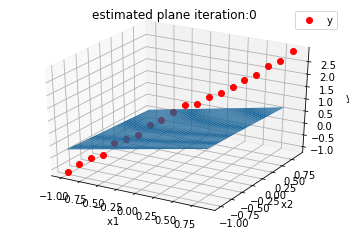

After Training: 


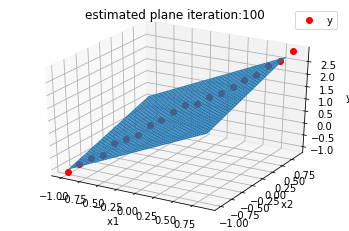

In [48]:
#train the model

LOSS=[]
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat=model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)              
                    

Text(0, 0.5, 'Cost/total loss ')

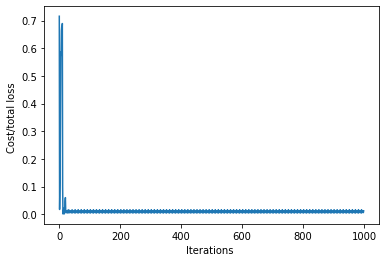

In [49]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

In [50]:
#Create a dataset class with two-dimensional features and two targets: 
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [51]:
data_set=Data()

In [52]:
model=Linear_regression(2,2)

optimizer = optim.SGD(model.parameters(), lr = 0.1)

criterion = nn.MSELoss()

train_loader=DataLoader(dataset=data_set,batch_size=5)

In [53]:
#Train the Model via Mini-Batch Gradient Descent

LOSS=[]
epochs=100
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()

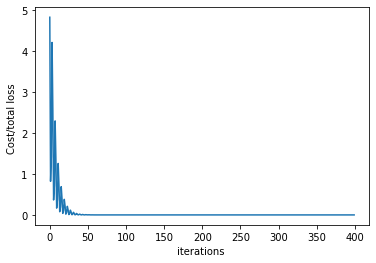

In [54]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

### Logistic Regression

In [55]:
class Logistic_Regression(nn.Module):
    def __init__(self,n_inputs):
        super(Logistic_Regression,self).__init__()
        self.linear=nn.Linear(n_inputs,1)
        
    def forward(self,x):
        yhat=torch.sigmoid(self.linear(x))
        return yhat

In [56]:
# Create x and X tensor

x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])
print('x = ', x)
print('X = ', X)

x =  tensor([[1.]])
X =  tensor([[-100.],
        [   0.],
        [ 100.]])


In [57]:
model = Logistic_Regression(1)

# Print parameters 

print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())

list(model.parameters()):
  [Parameter containing:
tensor([[-0.5426]], requires_grad=True), Parameter containing:
tensor([0.1590], requires_grad=True)]

model.state_dict():
  OrderedDict([('linear.weight', tensor([[-0.5426]])), ('linear.bias', tensor([0.1590]))])


In [58]:
yhat = model(x)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[0.4053]], grad_fn=<SigmoidBackward>)


In [59]:
yhat = model(X)
print("The prediction result: \n", yhat)

The prediction result: 
 tensor([[1.0000e+00],
        [5.3967e-01],
        [3.1880e-24]], grad_fn=<SigmoidBackward>)


In [60]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [61]:
#Setting seed
torch.manual_seed(0)

In [62]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [63]:
# Create Data object

data_set = Data()

In [64]:
# Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


<Figure size 432x288 with 0 Axes>

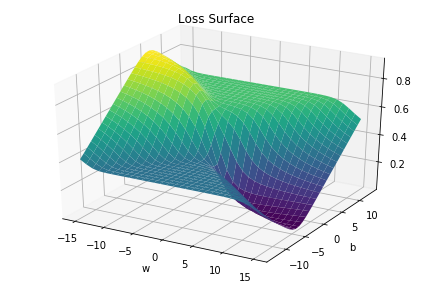

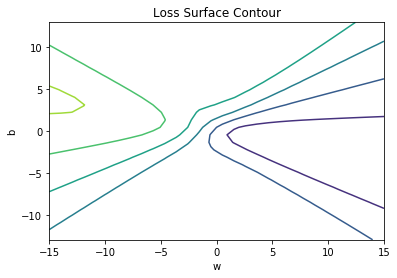

In [65]:
# Create the plot_error_surfaces object

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

In [66]:
# Create dataloader object, crierion function and optimizer.

trainloader = DataLoader(dataset=data_set, batch_size=3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

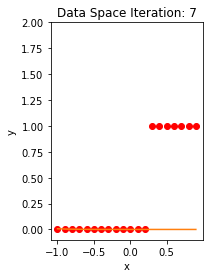

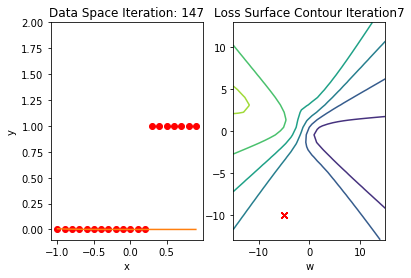

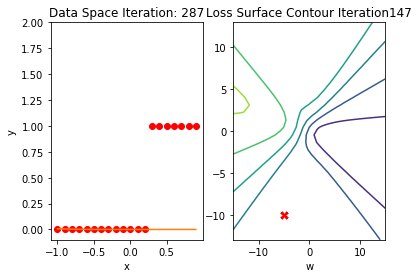

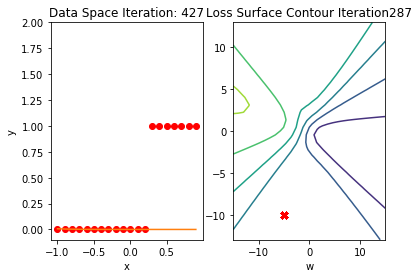

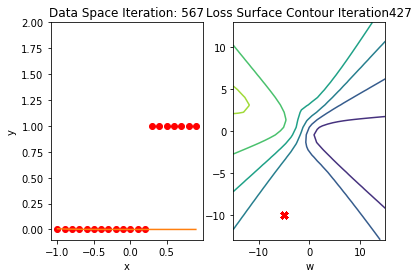

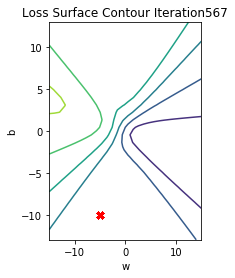

In [67]:
#Train the Model via Batch Gradient Descent

# Train the model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader: 
            yhat = model(x)
            loss = criterion_rms(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()

train_model(100)

In [68]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.BoolTensor)).type(torch.float)))

The accuracy:  tensor(0.6500)


#### Logistic Regression Training Negative Log likelihood (Cross-Entropy)

In [69]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len
    
data_set = Data()

In [70]:
model = Logistic_Regression(1)

# Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


In [71]:
# Create dataloader, criterion function and optimizer

def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

# Build in criterion
# criterion = nn.BCELoss()

trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [72]:
# Train the Model
Loss=[]
def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            Loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())

            
train_model(100)

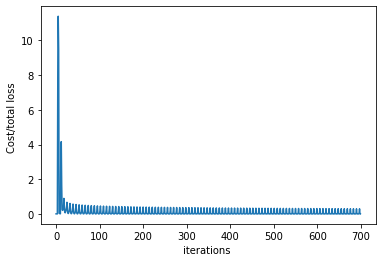

In [73]:
plt.plot(Loss)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

In [74]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.BoolTensor)).type(torch.float)))

The accuracy:  tensor(1.)


#### Softmax for multiple classification (MNIST)

In [75]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [76]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [77]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

In [93]:
train_dataset = dsets.MNIST(root='', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
print("Print the training dataset:\n ", train_dataset)
#setting root to blank,so that dataset can be donwloaded on same directory

validation_dataset = dsets.MNIST(root='', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))
print("Print the validating dataset:\n ", validation_dataset)


Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [97]:
# Define softmax classifier class

class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [98]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [99]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

In [100]:
# Create the model

model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [102]:
# Define the learning rate, optimizer, criterion and data loader


learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [114]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

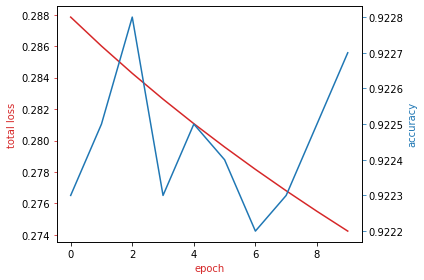

In [115]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

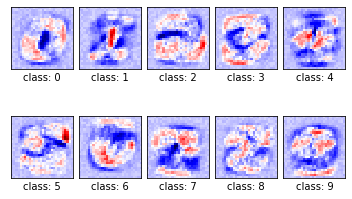

In [116]:
# Plot the parameters

PlotParameters(model)

#### One Hidden Layer Neural Network 

In [125]:
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

In [120]:
# Define a training function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for (x, y) in (train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [121]:
train_dataset = dsets.MNIST('', train=True, download=True, transform=transforms.ToTensor())

validation_dataset = dsets.MNIST('', train=False, download=True, transform=transforms.ToTensor())

In [122]:
criterion = nn.CrossEntropyLoss()

In [123]:
# Create data loader for both train dataset and valdiate dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [126]:
# Create the model with 100 neurons

input_dim = 28 * 28
hidden_dim = 64
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [128]:
# Set the learning rate and the optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [131]:
# Train the model

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=50)

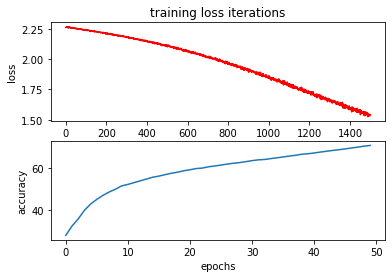

Model Accuracy :  0.9213


In [134]:
# Plot the accuracy and loss

# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

plot_accuracy_loss(training_results)

print("Model Accuracy : ",accuracy)

#### Neural Network By nn.Module( )

In [135]:
class Neural_Network(nn.Module):
    def __init__(self,Layers):
        super(self,Neural_Network).__init__()
        self.hidden=nn.Modulelist()
        for input_size,output_size in zip(Layers,Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
            
    def forward(self,activation):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

In [24]:
#Part I Ends here